In [89]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
import sys
import os
import json
import torch
import yaml
import numpy as np
import cv2
import copy
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
from nerfstudio.utils.eval_utils import eval_setup

In [91]:
os.chdir('/workspace/plane-nerf')
MODEL_PATH = "/workspace/plane-nerf/outputs/jackal_training_data_1_1_spins_fifth/plane-nerf/2024-03-09_205043"

In [92]:
config_path = os.path.join(MODEL_PATH, "config.yml")
config, pipeline, checkpoint_path, _ = eval_setup(
                        Path(config_path),
                        test_mode="inference",
                    )

tiny-cuda-nn warning: FullyFusedMLP is not supported for the selected architecture 52. Falling back to CutlassMLP. For maximum performance, raise the target GPU architecture to 75+.
tiny-cuda-nn warning: FullyFusedMLP is not supported for the selected architecture 52. Falling back to CutlassMLP. For maximum performance, raise the target GPU architecture to 75+.
tiny-cuda-nn warning: FullyFusedMLP is not supported for the selected architecture 52. Falling back to CutlassMLP. For maximum performance, raise the target GPU architecture to 75+.
tiny-cuda-nn warning: FullyFusedMLP is not supported for the selected architecture 52. Falling back to CutlassMLP. For maximum performance, raise the target GPU architecture to 75+.
tiny-cuda-nn warning: FullyFusedMLP is not supported for the selected architecture 52. Falling back to CutlassMLP. For maximum performance, raise the target GPU architecture to 75+.
tiny-cuda-nn warning: FullyFusedMLP is not supported for the selected architecture 52. Fal

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from 
outputs/jackal_training_data_1_1_spins_fifth/plane-nerf/2024-03-09_205043/nerfstudio_models/step-000009999.ckpt

In [93]:
#Camera object: generate_ray command to create
#RayBundle object

pipeline.eval()
pipeline.datamanager.setup_train()

for camera, batch in pipeline.datamanager.fixed_indices_train_dataloader:
    outputs = pipeline.model.get_outputs_for_camera(camera=camera)    
    break

Setting up training dataset...

Caching all 10 images.

torch.Size([720, 1280, 3])
torch.Size([720, 1280, 3])


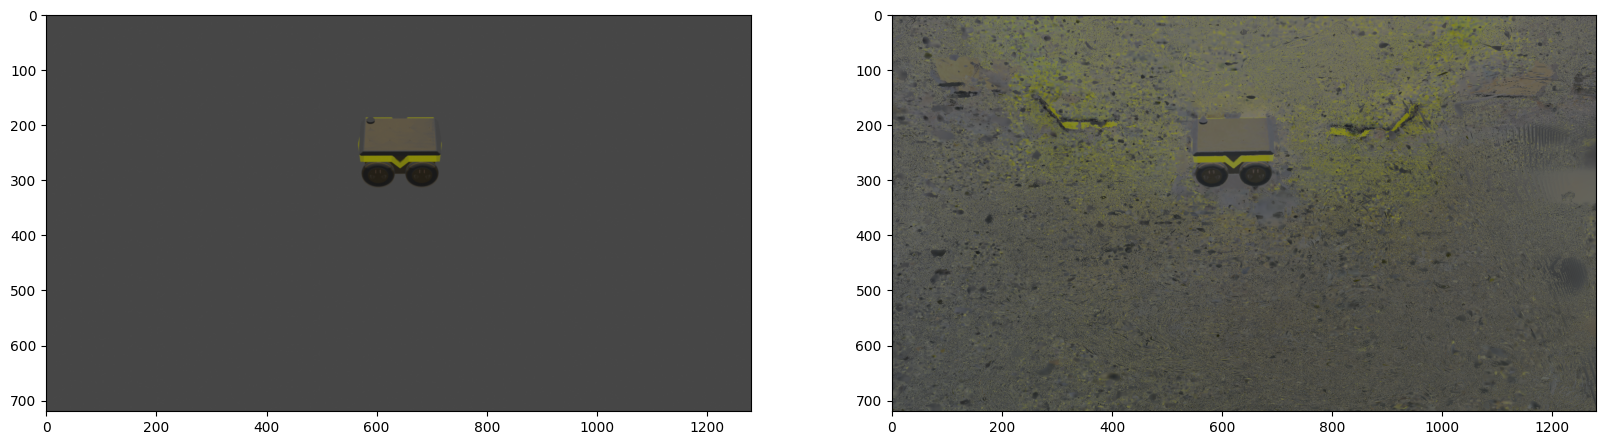

In [94]:
gt_rgb = batch["image"].to(pipeline.model.device)
predicted_rgb = outputs["rgb"]

print(gt_rgb.shape)
print(predicted_rgb.shape)

#Plot gt_rgb and predicted_rgb with matplotlib
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(gt_rgb.cpu().numpy())
plt.subplot(1, 2, 2)
plt.imshow(predicted_rgb.cpu().numpy())
plt.show()


In [95]:
print(pipeline.model.camera_optimizer.get_correction_matrices())

tensor([[[ 9.9965e-01, -2.6389e-02,  0.0000e+00,  1.5650e-05],
         [ 2.6389e-02,  9.9965e-01,  0.0000e+00, -5.1711e-05],
         [ 0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00]],

        [[ 9.9982e-01,  1.9113e-02,  0.0000e+00, -6.8777e-05],
         [-1.9113e-02,  9.9982e-01,  0.0000e+00,  5.8136e-05],
         [ 0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00]],

        [[ 9.9976e-01, -2.2108e-02,  0.0000e+00, -1.0092e-03],
         [ 2.2108e-02,  9.9976e-01,  0.0000e+00, -4.6894e-04],
         [ 0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00]],

        [[ 9.9973e-01, -2.3214e-02,  0.0000e+00, -8.5415e-04],
         [ 2.3214e-02,  9.9973e-01,  0.0000e+00, -1.0893e-03],
         [ 0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00]],

        [[ 9.9983e-01, -1.8695e-02,  0.0000e+00, -7.6653e-06],
         [ 1.8695e-02,  9.9983e-01,  0.0000e+00,  3.6852e-05],
         [ 0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00]],

        [[ 9.9996e-01,  8.6251e-03,  0.0000e+

In [96]:
custom_camera = copy.deepcopy(camera)

R_t = np.zeros((1,3,4))
R_t[0,0,0] = 1
R_t[0,1,1] = 1
R_t[0,2,2] = 1
R_t[0,0,3] = 0.2
print(R_t)
custom_camera.camera_to_worlds = torch.from_numpy(R_t).float().to(pipeline.model.device)
print(custom_camera.camera_to_worlds)
print(camera.width,camera.height)
print(camera.cx,camera.cy)

outputs = pipeline.model.get_outputs_for_camera(camera=custom_camera)    

[[[1.  0.  0.  0.2]
  [0.  1.  0.  0. ]
  [0.  0.  1.  0. ]]]
tensor([[[1.0000, 0.0000, 0.0000, 0.2000],
         [0.0000, 1.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 1.0000, 0.0000]]], device='cuda:0')
tensor([[1280]], device='cuda:0') tensor([[720]], device='cuda:0')
tensor([[640.]], device='cuda:0') tensor([[360.]], device='cuda:0')


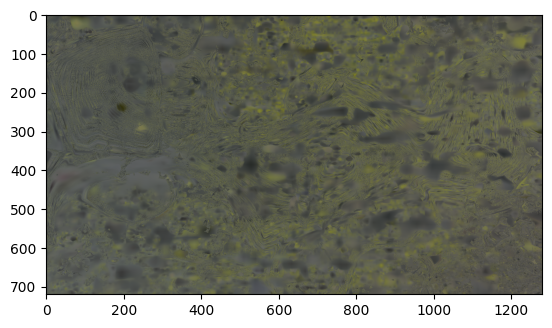

In [97]:
predicted_rgb = outputs["rgb"]
plt.imshow(predicted_rgb.cpu().numpy())
plt.show()


In [98]:
pose = [[
            0.7716223606773275,
            0.44995617866623094,
            -0.44959800909571546,
            -1.4163766779831086
        ],
        [
            -0.6360809166314835,
            0.5458366061702435,
            -0.545402114830702,
            -1.4353881313343146
        ],
        [
            0.0,
            0.7068251811053659,
            0.7073882691671998,
            2.5
        ],
        [
            0.0,
            0.0,
            0.0,
            1.0
        ]]

pose = pose[:3][:4]
pose = np.array([pose])
pose = torch.from_numpy(pose).float().to("cpu")
print(pose)

from plane_nerf.inerf_utils import transform_original_space_to_pose

new_camera_pose = transform_original_space_to_pose(pose, 
                                                   pipeline.datamanager.train_dataparser_outputs.dataparser_transform,
                                                   pipeline.datamanager.train_dataparser_outputs.dataparser_scale,
                                                   "opengl")
print(new_camera_pose)
custom_camera.camera_to_worlds = new_camera_pose.float().to(pipeline.model.device)
print(custom_camera.camera_to_worlds)
print(camera.width,camera.height)
print(camera.cx,camera.cy)

outputs = pipeline.model.get_outputs_for_camera(camera=custom_camera)    

tensor([[[ 0.7716,  0.4500, -0.4496, -1.4164],
         [-0.6361,  0.5458, -0.5454, -1.4354],
         [ 0.0000,  0.7068,  0.7074,  2.5000]]])
tensor([[[ 7.7162e-01,  4.4996e-01, -4.4960e-01, -4.7213e-01],
         [-6.3608e-01,  5.4584e-01, -5.4540e-01, -4.7846e-01],
         [-2.6819e-09,  7.0683e-01,  7.0739e-01,  0.0000e+00]]])
tensor([[[ 7.7162e-01,  4.4996e-01, -4.4960e-01, -4.7213e-01],
         [-6.3608e-01,  5.4584e-01, -5.4540e-01, -4.7846e-01],
         [-2.6819e-09,  7.0683e-01,  7.0739e-01,  0.0000e+00]]],
       device='cuda:0')
tensor([[1280]], device='cuda:0') tensor([[720]], device='cuda:0')
tensor([[640.]], device='cuda:0') tensor([[360.]], device='cuda:0')


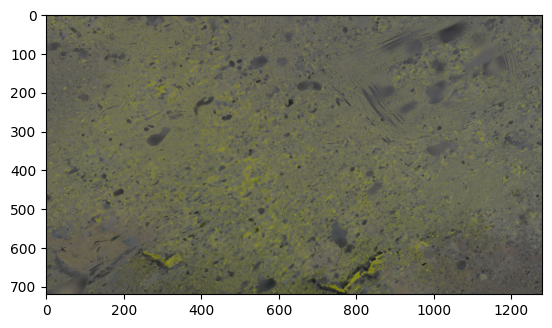

In [99]:
predicted_rgb = outputs["rgb"]
plt.imshow(predicted_rgb.cpu().numpy())
plt.show()

#Save predicted_rgb as an image
predicted_rgb = predicted_rgb.cpu().numpy()
predicted_rgb = (predicted_rgb * 255).astype(np.uint8)
predicted_rgb = Image.fromarray(predicted_rgb)
predicted_rgb.save(os.path.join(MODEL_PATH, "predicted_rgb.png"))